In [1]:
# Habeshan chatbot using python 3

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vitbot/Academic_Regulations_3.2.pdf
/kaggle/input/vitbot/QA.txt


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.0/777.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 281.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install transformers pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 32.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install tokenizers


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=0d67dd440595f81ae586062b409d40faa0e831ba209efa8af2ce6f936c7189d7
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Load the pre-trained BART model and tokenizer
model_name = "facebook/bart-large-cnn"
model = BartForConditionalGeneration.from_pretrained(model_name)
tokenizer = BartTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sentence_transformers import SentenceTransformer, util
model_match = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [8]:
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BartForConditionalGeneration, BartTokenizer
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Function to extract text from a PDF file and split it into lines
def extract_and_split_text(pdf_path):
    doc = fitz.open(pdf_path)
    lines = []

    for page_num in range(doc.page_count):
        page = doc[page_num]
        text = page.get_text()
        lines.extend(text.split('\n'))

    return lines

# PDF file path
pdf_path = "/kaggle/input/vitbot/Academic_Regulations_3.2.pdf"  # Update with your PDF file path

# Extract and split text from the PDF
documents = extract_and_split_text(pdf_path)

# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)


In [9]:
import pickle

# Define a custom Gym environment for the Chatbot
class ChatbotEnv(gym.Env):
    def __init__(self, documents):
        super(ChatbotEnv, self).__init__()
        self.documents = documents
        self.observation_space = gym.spaces.Discrete(len(documents))
        self.action_space = gym.spaces.Discrete(2)  # Two actions: 0 (bad feedback) and 1 (good feedback)
        self.state = None

    def step(self, action):
        # Calculate reward based on user feedback
        reward = self.calculate_reward(action)
        done = True  # Terminate the episode after one step
        info = {}

        return self.state, reward, done, info

    def reset(self):
        # Randomly select a document as the initial state
        self.state = random.choice(range(len(self.documents)))
        return self.state

    def calculate_reward(self, action):
            # Implement a reward mechanism based on user feedback (0 for bad, 1 for good)
            # For example, you can use a dictionary to map actions to rewards:
            reward_mapping = {
                0: -1,  # Bad feedback (penalize)
                1: 1    # Good feedback (reward)
            }
            return reward_mapping.get(action, 0)  # Default to 0 if action is not found in the mapping

# Define a simple Q-learning-based agent
class QLearningAgent:
    def __init__(self, num_states, num_actions, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.2):
        self.num_states = num_states
        self.num_actions = num_actions
        self.q_table = np.zeros((num_states, num_actions))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.state = None
        self.action = None

    def select_action(self, state):
        if random.random() < self.exploration_prob:
            return random.choice(range(self.num_actions))
        else:
            return np.argmax(self.q_table[state, :])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state, :])
        self.q_table[state, action] = (1 - self.learning_rate) * self.q_table[state, action] + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state, best_next_action])

    def save_q_table(self, file_path):
        with open(file_path, 'wb') as file:
            pickle.dump(self.q_table, file)

    def load_q_table(self, file_path):
        with open(file_path, 'rb') as file:
            self.q_table = pickle.load(file)

# Create an RL environment
chatbot_env = ChatbotEnv(documents)

# Create a Q-learning agent
num_states = len(documents)
num_actions = 2  # 0 (bad feedback), 1 (good feedback)
agent = QLearningAgent(num_states, num_actions)

# Training loop
for episode in range(10):
    state = chatbot_env.reset()

    for step in range(1):
        action = agent.select_action(state)
        next_state = state  # No state transition in this simplified example
        reward = chatbot_env.calculate_reward(action)
        agent.update_q_table(state, action, reward, next_state)

In [10]:
import random

def rand_ques(file_path):
  # Read the contents of the text file into a list
  with open(file_path, "r") as file:
      lines = file.readlines()

  # Initialize variables to store questions and answers
  questions = []
  answers = []
  current_question = None
  current_answer = None

  # Parse the text file to extract questions and answers
  for line in lines:
      line = line.strip()
      if line.startswith("Question: "):
          # Store the previous question and answer (if available)
          if current_question and current_answer:
              questions.append(current_question)
              answers.append(current_answer)
          # Start a new question
          current_question = line.replace("Question: ", "")
          current_answer = None
      elif line.startswith("Answer: "):
          # Store the answer
          current_answer = line.replace("Answer: ", "")

  # Store the last question and answer (if available)
  if current_question and current_answer:
      questions.append(current_question)
      answers.append(current_answer)

  # Randomly select a set of questions and answers
  num_samples = 1  # Replace with the number of samples you want
  random_samples = random.sample(range(len(questions)), num_samples)

  # Print the randomly selected questions and answers
  return questions[random_samples[0]],answers[random_samples[0]]

In [11]:
from sentence_transformers import SentenceTransformer, util

def match_sentence(sentence1,sentence2):
  # Encode the sentences to get their embeddings
  embeddings = model_match.encode([sentence1, sentence2], convert_to_tensor=True)

  # Calculate cosine similarity
  cosine_score = util.pytorch_cos_sim(embeddings[0], embeddings[1])

  return cosine_score.item()

Episode 1, Total Reward: 11
Episode 2, Total Reward: 5
Episode 3, Total Reward: 9
Episode 4, Total Reward: 9
Episode 5, Total Reward: 11
Episode 6, Total Reward: 13
Episode 7, Total Reward: 5
Episode 8, Total Reward: 9
Episode 9, Total Reward: 9
Episode 10, Total Reward: 9
Episode 11, Total Reward: 13
Episode 12, Total Reward: 9
Episode 13, Total Reward: 11
Episode 14, Total Reward: 9
Episode 15, Total Reward: 13
Episode 16, Total Reward: 9
Episode 17, Total Reward: 9
Episode 18, Total Reward: 9
Episode 19, Total Reward: 7
Episode 20, Total Reward: 13
Episode 21, Total Reward: 9
Episode 22, Total Reward: 9
Episode 23, Total Reward: 9
Episode 24, Total Reward: 9
Episode 25, Total Reward: 11


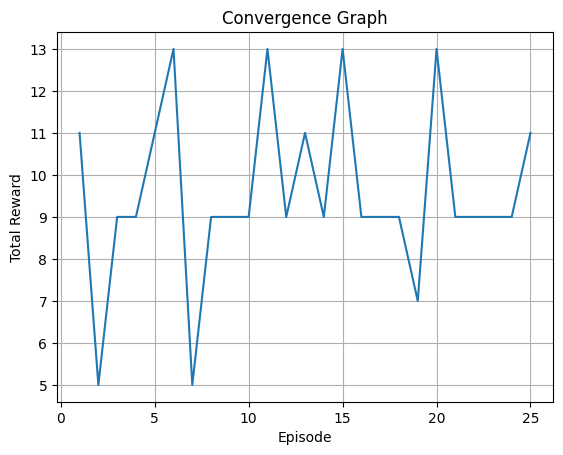

In [12]:
import matplotlib.pyplot as plt

# Training parameters
num_episodes = 25

file_path = "/kaggle/input/vitbot/QA.txt"  # Replace with the path to your text file

# Lists to collect rewards and episode numbers for plotting
rewards = []
episode_numbers = []

# Training loop
for episode in range(num_episodes):
    state = chatbot_env.reset()
    total_reward = 0  # To track the cumulative reward for this episode

    for step in range(15):
        ques, ans = rand_ques(file_path)
        user_query = ques

        if user_query.lower() == 'exit':
            break

        user_query_vector = tfidf_vectorizer.transform([user_query])
        similarity_scores = cosine_similarity(user_query_vector, tfidf_matrix)
        sorted_indices = similarity_scores.argsort()[0][::-1]
        top_matching_documents = [documents[i] for i in sorted_indices]

        pdf_text = " ".join(top_matching_documents[:100])

        input_text = f"User Query: {user_query}\nPDF Text: {pdf_text}"

        input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)

        # Adjust hyperparameters based on Q-values (for bad feedback)
        q_value = agent.q_table[state][0]  # Using the Q-value for action 0 (bad feedback)
        beam_size = int(4 + q_value * 6)  # Adjust beam size based on Q-value
        min_length = int(30 - q_value * 10)  # Adjust min_length based on Q-value

        # Generate the summary with adjusted hyperparameters
        summary_ids = model.generate(input_ids, num_beams=beam_size, min_length=min_length, max_length=200, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

        probab = match_sentence(ans, summary)
        if probab >= 0.50:
            feedback = 1
        else:
            feedback = 0

        # Update Q-table based on feedback (action 0 for bad feedback)
        action = 0 if feedback == 0 else 1
        agent.update_q_table(state, action, feedback, state)

        rew = -1 if feedback == 0 else 1
        total_reward += rew  # Collect cumulative reward for this episode

        state = state  # Update the state (no state transition in this simplified example)

    # Append the total reward and episode number to the lists
    rewards.append(total_reward)
    episode_numbers.append(episode + 1)
    agent.save_q_table('q_table.pkl')

    print(f"Episode {episode + 1}, Total Reward: {total_reward}")

# Save the Q-table after training

# Plot the convergence graph
plt.plot(episode_numbers, rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Convergence Graph')
plt.grid(True)
plt.show()

In [13]:
# Create a conversation loop
# while True:
#     user_query = input("You: ")

#     if user_query.lower() == 'exit':
#         break

#     user_query_vector = tfidf_vectorizer.transform([user_query])
#     similarity_scores = cosine_similarity(user_query_vector, tfidf_matrix)
#     sorted_indices = similarity_scores.argsort()[0][::-1]
#     top_matching_documents = [documents[i] for i in sorted_indices]

#     pdf_text = " ".join(top_matching_documents[:100])

#     input_text = f"User Query: {user_query}\nPDF Text: {pdf_text}"

#     input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)

#     # Adjust hyperparameters based on Q-values (simplified example)
#     q_value = agent.q_table[chatbot_env.state][0]  # Using the Q-value for action 0
#     beam_size = int(4 + q_value * 6)  # Adjust beam size based on Q-value
#     min_length = int(30 - q_value * 10)  # Adjust min_length based on Q-value

#     # Generate the summary with adjusted hyperparameters
#     summary_ids = model.generate(input_ids, num_beams=beam_size, min_length=min_length, max_length=200, early_stopping=True)
#     summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

#     print("Bot (BART): ", summary)

#     # Use Q-learning agent to adjust the Q-values (simplified example)
#     agent.state = chatbot_env.state
#     feedback = int(input("Was the answer helpful? (0 for bad, 1 for good): "))
#     action = feedback  # Q-learning action based on feedback
#     agent.update_q_table(agent.state, action, feedback, agent.state)

#     if feedback == 0:
#         print("Bot: I'm sorry the answer wasn't helpful. I'll try to improve.")
#     else:
#         print("Bot: Thank you for the feedback. I'll continue to learn and provide better answers.")